## Bursty Dynamics

We will demonstrate how to use Burst_dynamic to:
- calcualte the Burstness Parameter (BP) and Memory Coefficient (MC).
- detect train of events
- Get inforamtion of the trains
- calculate the BP and MC of the trains.

## Imports

In [1]:
import pandas as pd

#for now
import sys
sys.path.append('../bursty_dynamics')
from scores import calculate_scores
from trains import train_detection, train_info, train_scores
from visual import *

# from bursty_dynamics.scores import calculate_scores
# from bursty_dynamics.trains import train_detection, train_info, train_scores
# from bursty_dynamics.visual import *

## Load data

we will use the 'set3a1.txt' medical data from [UK Biobank Synthetic Dataset](https://biobank.ndph.ox.ac.uk/synthetic_dataset/). 
Out of 23827 unique eids, there are only 500 eids in the example_data.txt because of the limited data space on Github.


In [25]:
df = pd.read_csv("example_data.txt", delimiter= '\t')

In [26]:
df.shape

(858626, 8)

In [27]:
df.head()

,eid,data_provider,event_dt,read_2,read_3,value1,value2,value3
0,1707540,1,2000-01-01,635..,NaN,NaN,NaN,NaN
1,1707540,1,2000-01-01,J11..,NaN,NaN,NaN,NaN
2,1707540,1,2000-01-01,12E2.,NaN,NaN,NaN,NaN
3,1707540,1,2000-01-01,452..,NaN,33.94,80.319,NaN
4,1707540,1,1999-12-31,05K3.,NaN,NaN,NaN,NaN


## Calculate BP and MC. 

We can calculate the BP and the MC per subject id using the calculate_scores function. You will need to input the data, subject id, and date column. 

In [28]:
# calculate scores
score_df = calculate_scores(df, subject_id = 'eid', time_col = 'event_dt')
score_df.head()

,eid,BP,MC
0,1007157,0.606976,0.188424
1,1016564,0.528581,0.631336
2,1019777,0.554650,0.726996
3,1037979,0.376930,0.562070
4,1046250,0.296580,0.491646


We can view a scatter plot of BP against MC by using the parameter 'scatter'.

In [29]:
score_df = calculate_scores(df, subject_id = 'eid', time_col = 'event_dt', scatter=True)

We can view histogram of the BP and MC using the parameter 'hist'. <br>
hist (str or None): <br>
- True: Plot histograms for both BP and MC.<br>
- "BP": Plot histogram for BP only.<br>
- "MC": Plot histogram for MC only.<br>
- "Both": Plot histograms for both BP and MC on the same plot.<br>


In [31]:
score_df = calculate_scores(df, subject_id='eid', time_col='event_dt', scatter=True, hist=True)

In [32]:
score_df = calculate_scores(df, subject_id='eid', time_col='event_dt', scatter=True, hist='Both')

## Detect trains

We can detect trains using the train_detection function. <br>
Max_iet is the maximum distance between consecutive events in a train (in days). <br>
min_burst: minimum number of events to form a train. It can have multiple events at one timepoint. <br>
only_trains: True if you only want to get events in a train. False if you want events in and out of trains. Default is True. <br>
Note: train_id = 0 is not a train. They represent events that are not in a train. 

In [33]:
train_df = train_detection(df, subject_id = 'eid', time_col = 'event_dt', max_iet=30, time_unit='days', min_burst=3, only_trains= True)

In [34]:
train_df.head()

,eid,data_provider,event_dt,read_2,read_3,value1,value2,value3,train_id
542984,1007157,4,1974-08-15,7H290,NaN,36.947,47.591,NaN,2
543469,1007157,4,1974-08-18,65FV.,NaN,NaN,NaN,NaN,2
543691,1007157,4,1974-08-22,K0A53,NaN,95.000,40.000,NaN,2
544074,1007157,4,1975-05-13,43iG.,NaN,NaN,NaN,NaN,5
544450,1007157,4,1975-05-24,687F2,NaN,83.815,36.296,NaN,5


## Train information

We can use the calculate_train_info fucntion to find more information about the trains. <br>
unique_event_counts: counts of unique events (by time_col) for each combination of subject_id and train_id. No duplicate events with the same time. <br>
total_term_counts: total counts of events for each combination of subject_id and train_id. <br>
total_clusters: Total counts of trains detected for each subject_id (not including 0s). <br>

In [11]:
train_info_df = train_info(train_df, subject_id = 'eid', time_col = 'event_dt', summary_statistic=True)

Average count of trains per patient: 67.07
Average duration of trains (in days): 99
Median duration of trains (in days): 50
Range of unique events per train: 1 - 3585
Range of all events per train: 3 - 4977


In [12]:
train_info_df.head()

,eid,train_id,unique_event_counts,total_term_counts,train_start,train_end,train_duration_yrs,total_trains
0,1007157,2,3,3,1974-08-15,1974-08-22,0.02,36
1,1007157,5,3,3,1975-05-13,1975-06-15,0.09,36
2,1007157,6,4,4,1975-08-09,1975-09-20,0.11,36
3,1007157,16,3,3,1978-09-24,1978-10-04,0.03,36
4,1007157,18,4,5,1979-08-08,1979-09-26,0.13,36


## Calculate scores of trains

We can calculate the scores of the trains detected using the calculate_scores_train function. <br>
min_event_n: the mimimum number of events (no duplicates) that should be in a train. <br>
If a number x is given to the argument min_event_n, the resulting data will only show trains that have at least x number of events (no duplicate events on the same timepoint) in the train, excluding train_id = 0. 

In [13]:
train_score_df = train_scores(train_df, subject_id = 'eid', time_col ='event_dt', min_event_n= 5)
train_score_df.head()

,eid,train_id,BP,MC
0,1007157,19,-0.111111,-0.798446
1,1007157,20,-0.284329,-0.269896
2,1007157,23,-0.333745,-0.500000
3,1007157,24,-0.112983,-0.528501
4,1007157,26,-0.330692,-0.848931


We can display scatter plot and histogram using scatter and hist parameter. <br>

hist (str or None): <br>
- True: Plot histograms for both BP and MC.<br>
- "BP": Plot histogram for BP only.<br>
- "MC": Plot histogram for MC only.<br>
- "Both": Plot histograms for both BP and MC on the same plot.<br>
- None: Do not plot any histograms.<br>

In [14]:
train_score_df = train_scores(train_df, subject_id='eid', time_col='event_dt', min_event_n=5, scatter=True, hist=True)

In [15]:
train_score_df = train_scores(train_df, subject_id='eid', time_col='event_dt', min_event_n=5, scatter=True, hist='Both')

### Plots

lower_limit

In [16]:
gplot = gridplot(train_score_df, bins=25, lower_limit=100)

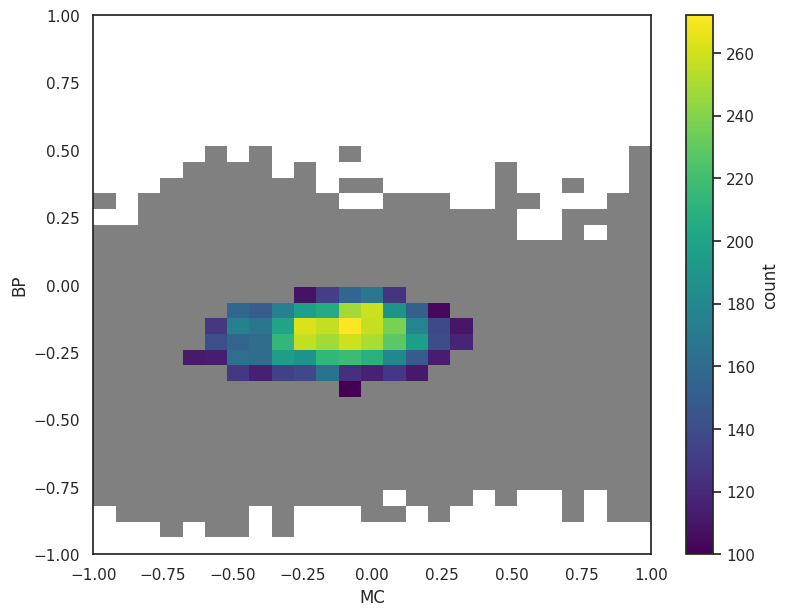

In [17]:
gplot

In [18]:
def scatterplot(df, set_axis=False, **kwargs):
    """
    Create a scatter plot with marginal histograms showing the relationship between 'MC' and 'BP'.

    Parameters
    ----------
    df : DataFrame
        Input DataFrame containing columns 'MC' and 'BP'.
    set_axis : bool, optional
        Whether to set axis limits to [-1, 1]. Default is False.

    Returns
    -------
    seaborn.axisgrid.JointGrid
        JointGrid object containing the scatter plot and marginal histograms.
    """
    sns.set_theme(style='white')
    plot= sns.jointplot(data=df, x="MC", y="BP", kind="reg", scatter_kws=dict(alpha=0.3, color='blue'),  line_kws=dict(color='black', linewidth=1),
                       marginal_kws=dict(bins=20), **kwargs)
    if set_axis:
        plot.ax_joint.set_xlim(-1, 1)
        plot.ax_joint.set_ylim(-1, 1)

    return plot

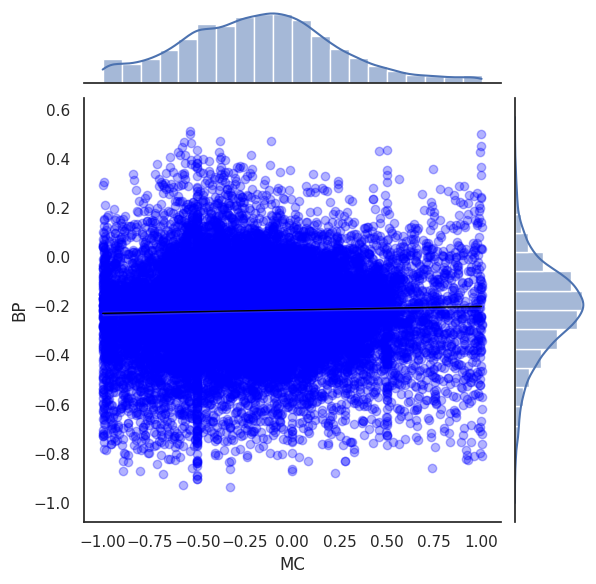

In [19]:
plot = scatterplot(train_score_df, set_axis=False)

In [20]:
hplot = histogram(train_score_df, hist='Both', set_axis=False)

In [21]:
duration_plot = train_duration(train_info_df, x_limit = 5)

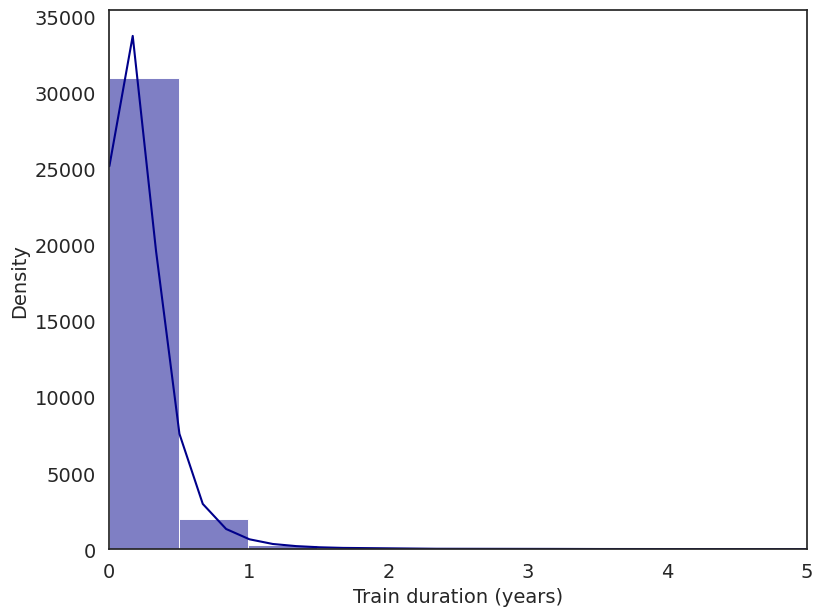

In [22]:
duration_plot

In [23]:
count_plot = event_counts(train_info_df, x_limit=30)

/data/WHRI-Bioinformatics/NIHR_AIM/CPRD/Papers/Burstiness/bursty_dynamics/bursty_dynamics/visual.py:180: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


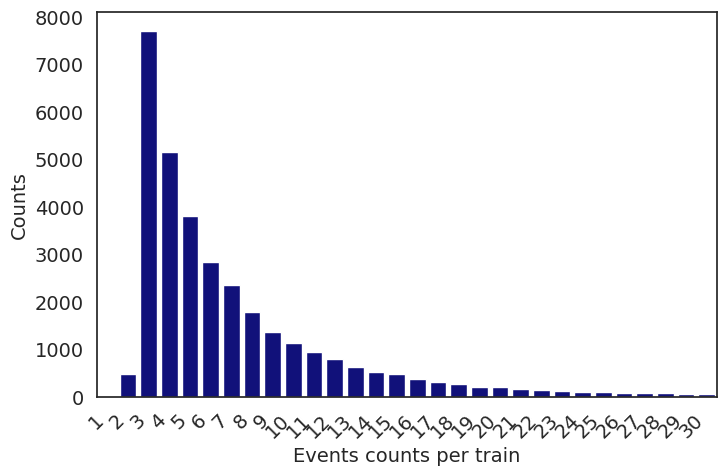

In [24]:
count_plot